# Do Large Companies Hire More Entry-Level Data Science Professionals?

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
clean_data_path = "Resources/clean_data.csv"

# Read the mouse data and the study results
clean_data_df = pd.read_csv(clean_data_path)

# Display the data table for preview
clean_data_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M


## Job Title vs. Company Size

In [86]:
# Group by 'company_size' and 'job_title', count occurrences, and reset the index
grouped_size_data = clean_data_df.groupby(['company_size', 'job_title']).size().reset_index(name='count')

# Find the top 5 job titles for each company size
top_job_titles = grouped_size_data.sort_values(by='count', ascending=False).groupby('company_size').head(5).reset_index(drop=True)

# Merge with the original DataFrame to get additional information
result_df = pd.merge(top_job_titles, clean_data_df, on=['company_size', 'job_title'], how='inner')

# Display or use the resulting DataFrame as needed
result_df

,company_size,job_title,count,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,M,Data Engineer,1603,2023,SE,FT,130410,USD,130410,US,0,US
1,M,Data Engineer,1603,2023,SE,FT,92000,USD,92000,US,0,US
2,M,Data Engineer,1603,2023,SE,FT,130410,USD,130410,US,0,US
3,M,Data Engineer,1603,2023,SE,FT,92000,USD,92000,US,0,US
4,M,Data Engineer,1603,2023,SE,FT,333500,USD,333500,US,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...
5521,S,Data Scientist,3,2023,EN,FT,110000,USD,110000,US,50,US
5522,S,ML Engineer,2,2023,MI,CT,30000,USD,30000,US,100,US
5523,S,ML Engineer,2,2023,MI,CT,25500,USD,25500,US,100,US
5524,S,Machine Learning Scientist,2,2023,MI,FT,200000,USD,200000,US,0,US


In [87]:
job_title_counts = result_df.groupby(['company_size', 'job_title']).size().reset_index(name='value_counts')
job_title_counts

,company_size,job_title,value_counts
0,L,Applied Scientist,164
1,L,Business Intelligence Engineer,76
2,L,Data Engineer,33
3,L,Machine Learning Engineer,17
4,L,Research Scientist,19
5,M,Data Analyst,1062
6,M,Data Engineer,1603
7,M,Data Scientist,1455
8,M,Machine Learning Engineer,832
9,M,Research Scientist,250


In [79]:
count_grouped_data = clean_data_df.groupby(['company_size', 'job_title']).size().reset_index(name='job_title_count')

total_counts = count_grouped_data.groupby('company_size')['job_title_count'].sum().reset_index(name='total_job_title_count')
total_counts

,company_size,total_job_title_count
0,L,378
1,M,6962
2,S,21


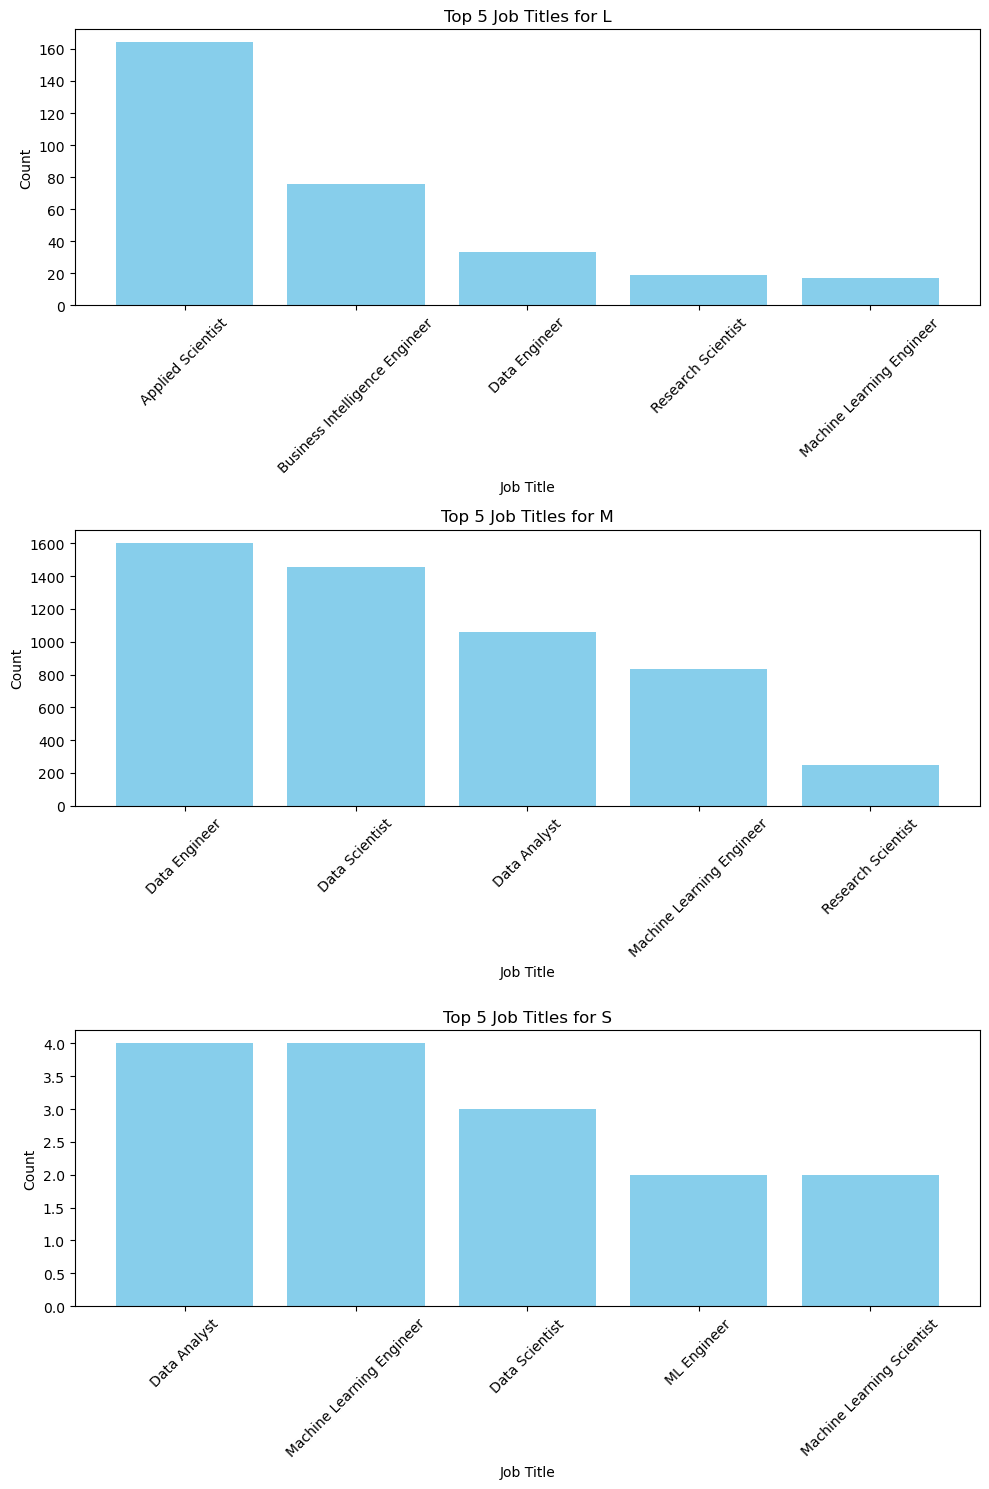

In [85]:
# Get unique company sizes for creating subplots
company_sizes = result_dataframe['company_size'].unique()

# Create subplots for each company size
fig, axes = plt.subplots(nrows=len(company_sizes), ncols=1, figsize=(10, 5 * len(company_sizes)))

# Plotting for each company size
for i, size in enumerate(company_sizes):
    ax = axes[i]
    data_for_size = result_dataframe[result_dataframe['company_size'] == size]
    ax.bar(data_for_size['job_title'], data_for_size['count'], color='skyblue')
    ax.set_title(f"Top 5 Job Titles for {size}")
    ax.set_xlabel("Job Title")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

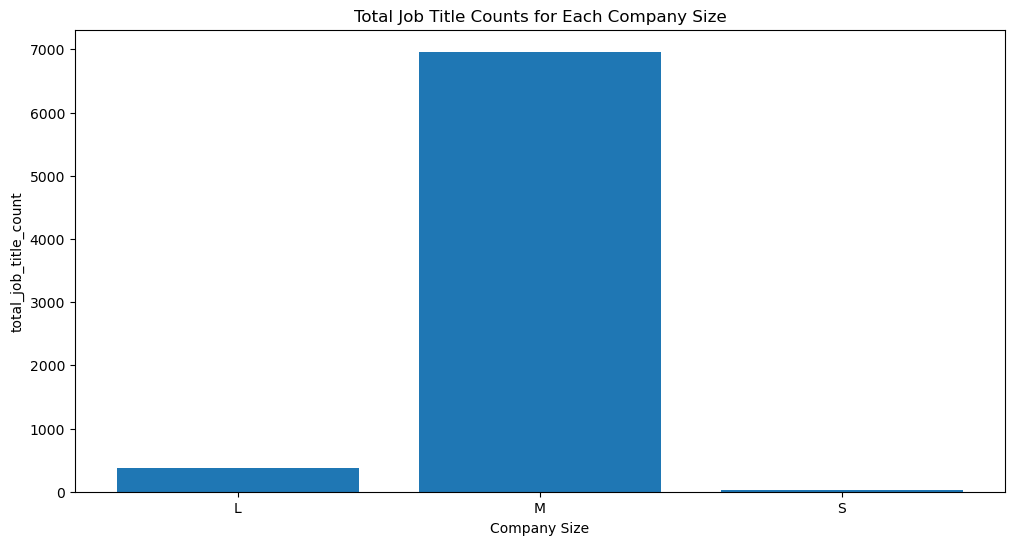

In [24]:
# Create a bar chart for total job title counts for each company size
plt.figure(figsize=(12, 6))
plt.bar(total_counts['company_size'], total_counts['total_job_title_count'])
plt.title('Total Job Title Counts for Each Company Size')
plt.xlabel('Company Size')
plt.ylabel('total Job Title Count')
plt.show()

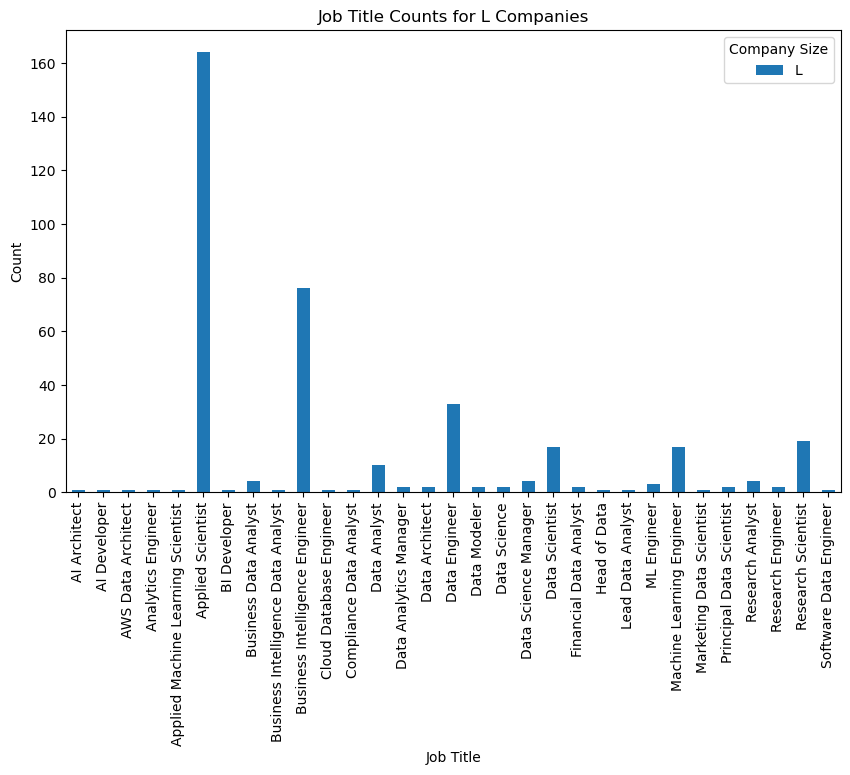

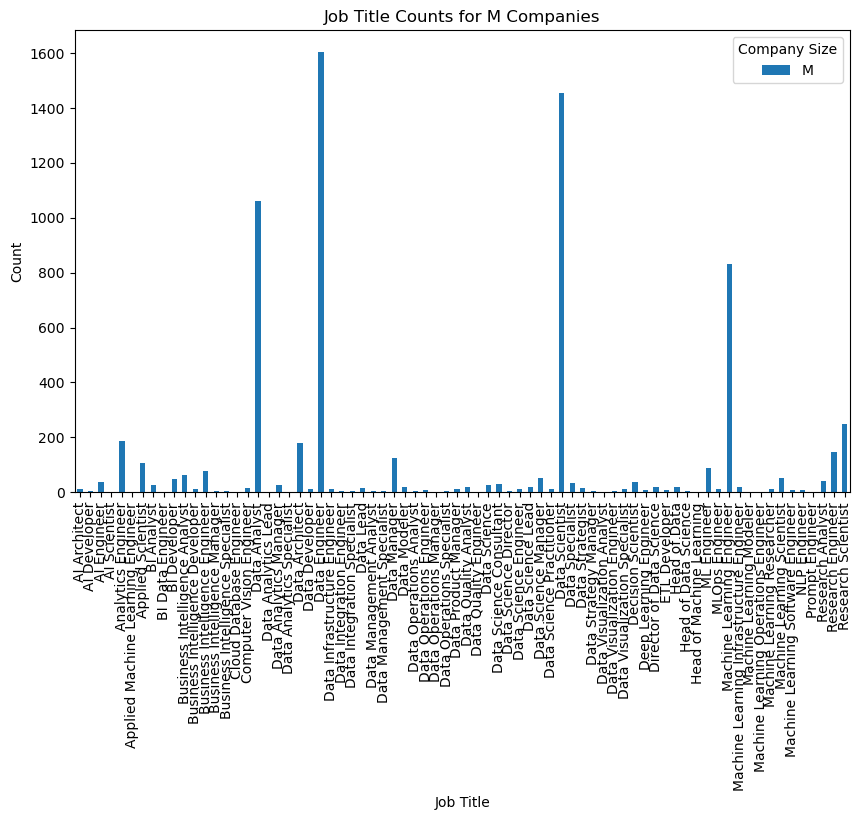

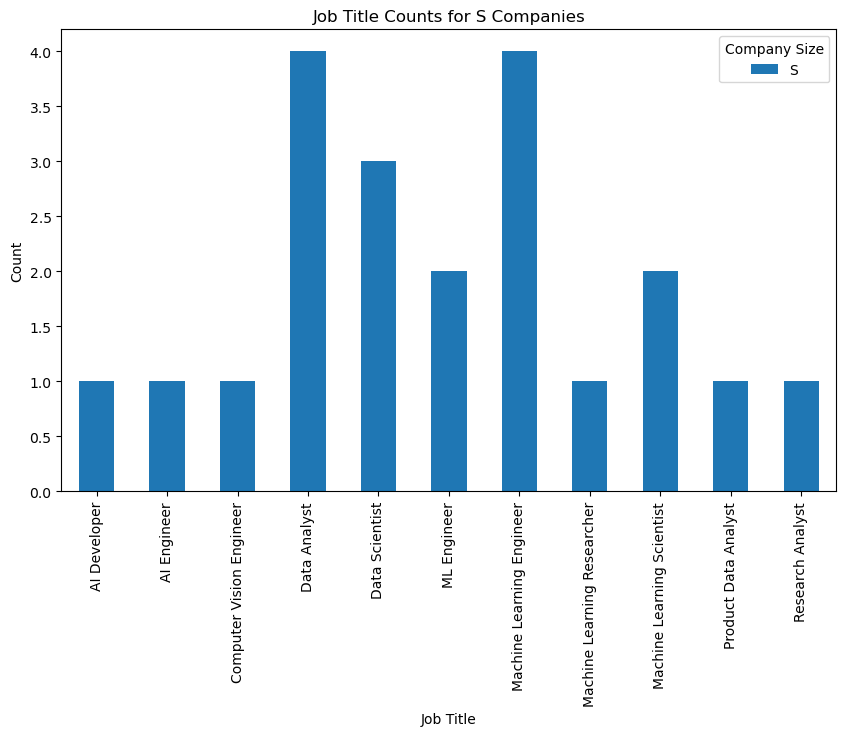

In [20]:
unique_sizes = count_grouped_data['company_size'].unique()

# Create a separate bar chart for each company size
for size in unique_sizes:
    size_data = count_grouped_data[count_grouped_data['company_size'] == size]
    pivot_data = size_data.pivot(index='job_title', columns='company_size', values='job_title_count').fillna(0)
    
    ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Customize the plot for each company size
    plt.title(f'Job Title Counts for {size} Companies')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.legend(title='Company Size')
    
    plt.show()

## Salary, job title, company size, experience level

In [3]:
number_salaries = clean_data_df["salary"].count()
number_salaries

7361

In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_salary_df = clean_data_df.groupby("company_size")["salary_in_usd"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_salary_df

,mean,median,var,std,sem
company_size,,,,,
L,170404.084656,159100.0,4.048061e+09,63624.377306,3272.484853
M,159929.585177,150000.0,3.912300e+09,62548.380575,749.633628
S,130747.619048,125000.0,3.070888e+09,55415.590036,12092.673144


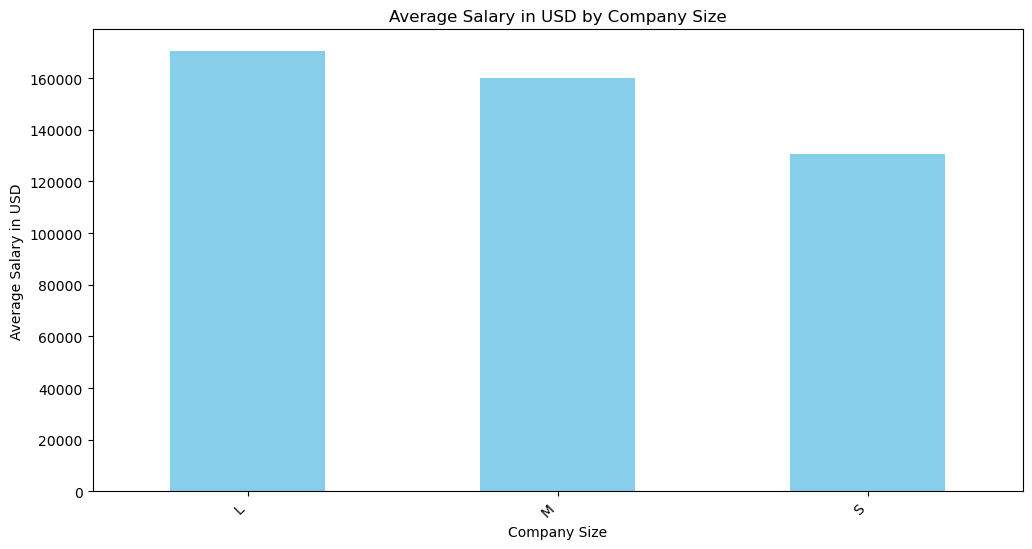

In [26]:
average_salary_by_size = clean_data_df.groupby('company_size')['salary_in_usd'].mean()

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
average_salary_by_size.plot(kind='bar', color='skyblue')
plt.title('Average Salary in USD by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x600 with 0 Axes>

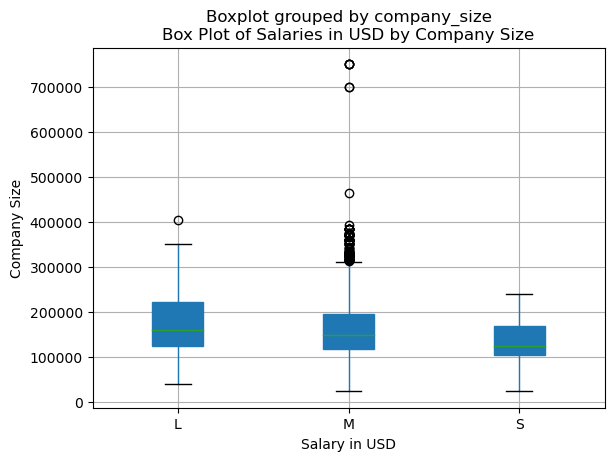

In [33]:
plt.figure(figsize=(12, 6))
clean_data_df.boxplot(column='salary_in_usd', by='company_size', vert=True, patch_artist=True)
plt.title('Box Plot of Salaries in USD by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')
plt.show()

## Experience Level vs. Company Size vs. Job Title

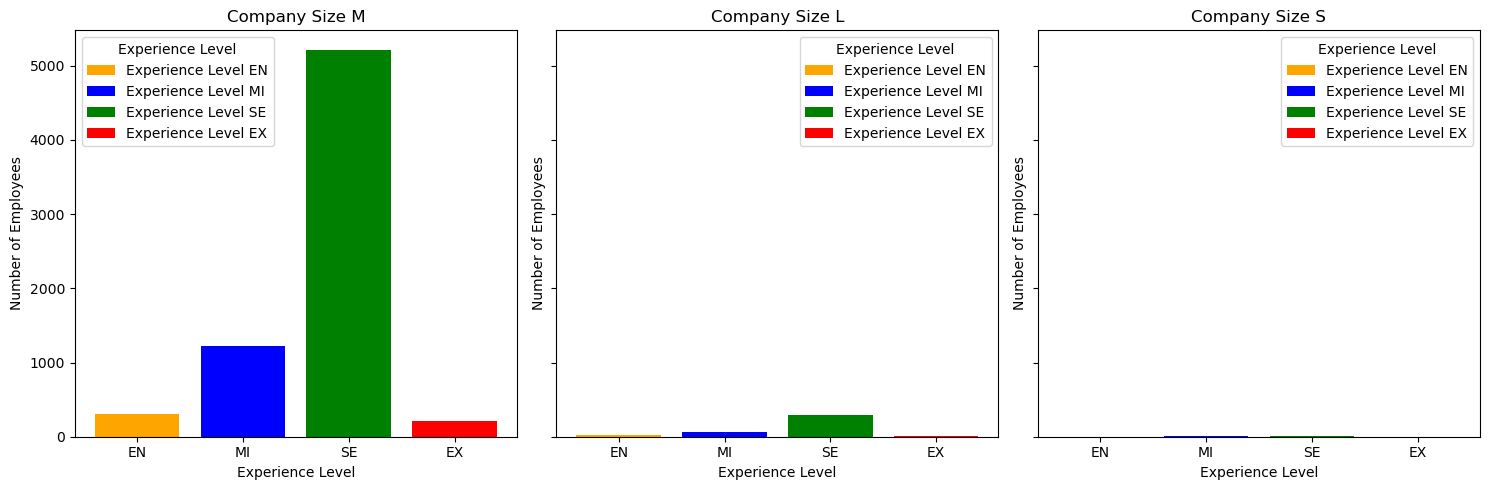

In [49]:
experience_order = ['EN', 'MI', 'SE', 'EX']

# Mapping for colors based on experience level
colors = {'EN': 'orange', 'MI': 'blue', 'SE': 'green', 'EX': 'red'}

# Get unique company sizes
unique_sizes = clean_data_df['company_size'].unique()

# Plotting using Matplotlib subplots
fig, axes = plt.subplots(nrows=1, ncols=len(unique_sizes), figsize=(15, 5), sharey=True)

for i, size in enumerate(unique_sizes):
    ax = axes[i]
    df_subset = clean_data_df[clean_data_df['company_size'] == size]
    
    # Create a countplot for each company size
    for experience_level in experience_order:
        subset_counts = df_subset[df_subset['experience_level'] == experience_level].shape[0]
        ax.bar(experience_level, subset_counts, label=f'Experience Level {experience_level}', color=colors[experience_level])

    ax.set_title(f'Company Size {size}')
    ax.set_xlabel('Experience Level')
    ax.set_ylabel('Number of Employees')
    ax.legend(title='Experience Level')

plt.tight_layout()
plt.show()

In [95]:
# Group by 'company_size', 'job_title', and 'experience_level', count occurrences, and reset the index
grouped_exp_data = result_df.groupby(['company_size', 'job_title', 'experience_level']).size().reset_index(name='count')

grouped_exp_data

,company_size,job_title,experience_level,count
0,L,Applied Scientist,EN,6
1,L,Applied Scientist,MI,28
2,L,Applied Scientist,SE,130
3,L,Business Intelligence Engineer,MI,10
4,L,Business Intelligence Engineer,SE,66
5,L,Data Engineer,EN,1
6,L,Data Engineer,MI,4
7,L,Data Engineer,SE,28
8,L,Machine Learning Engineer,MI,5
9,L,Machine Learning Engineer,SE,12


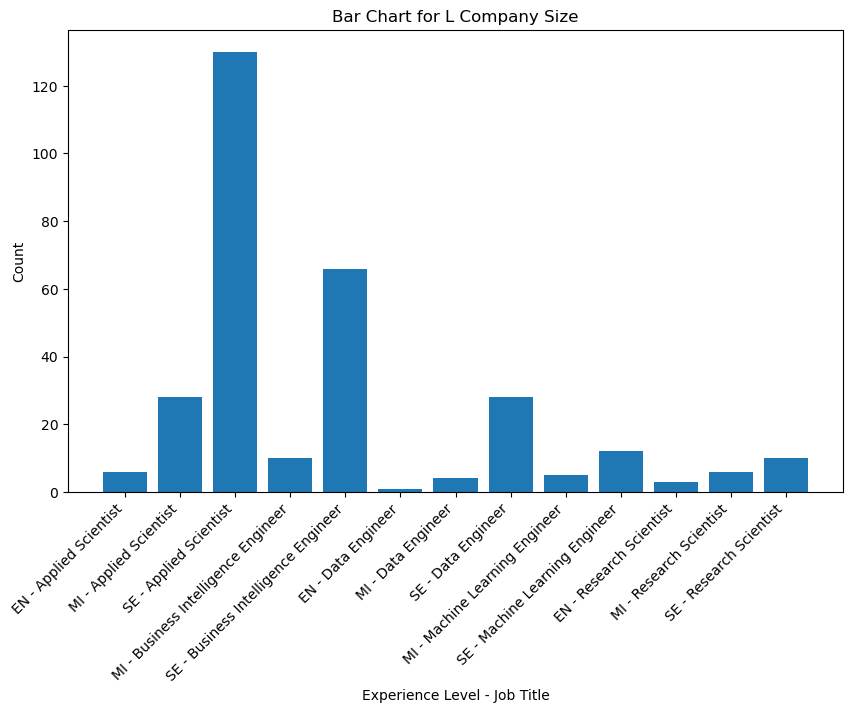

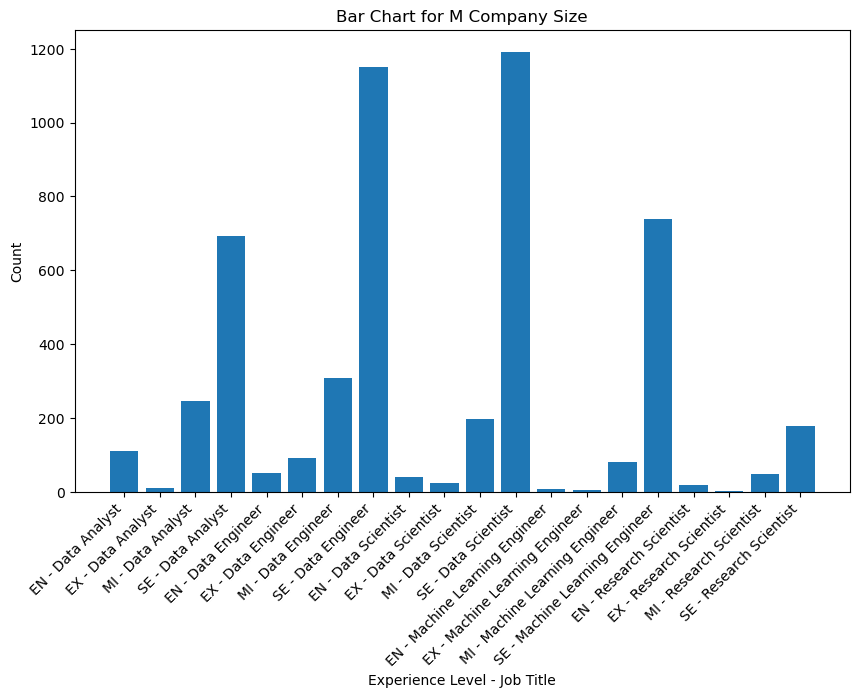

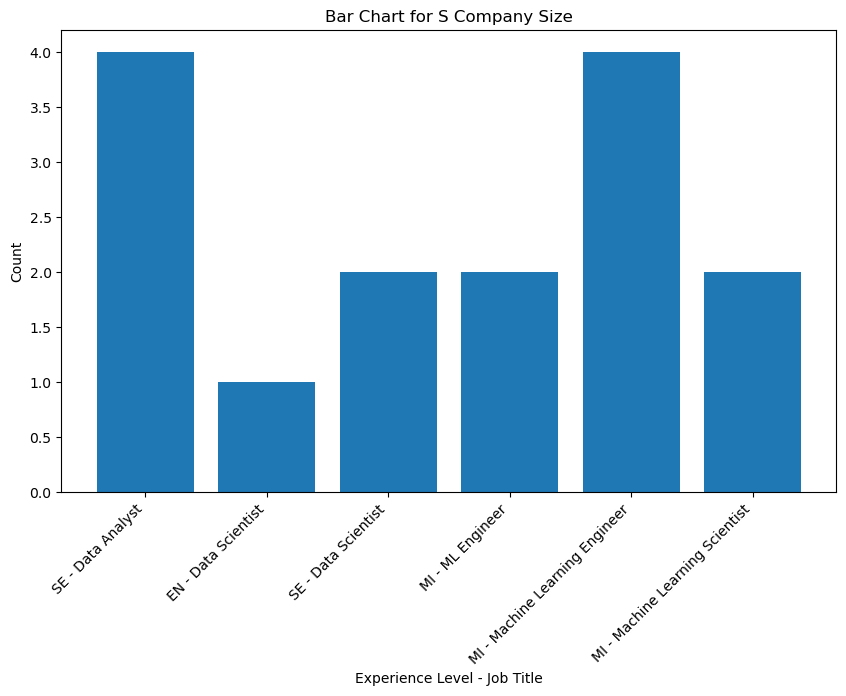

In [96]:
company_sizes = grouped_exp_data['company_size'].unique()

for company_size in company_sizes:
    subset_data = grouped_exp_data[grouped_exp_data['company_size'] == company_size]
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(subset_data['experience_level'] + ' - ' + subset_data['job_title'], subset_data['count'])
    plt.title(f'Bar Chart for {company_size} Company Size')
    plt.xlabel('Experience Level - Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()